# HW 3: Lyft Data Challenge

In this assignment, we will apply various EDA techniques we learned in class to the Lyft dataset to make sense of data and get better insight into the problem. We will mainly use the following python pacakges (so, refer to their documentations).
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/api/index.html)

Also, you will need to study my slides for Lecture 7 (Data Wrangling).

## Submission instruction
- Due by 11:59pm on **Sep. 30th, 2019**
- Complete this notebook and name it as "*CSCI3360\_HW3\_{your first name}.ipynb*".
- Do **not** use any other 3rd party libraries unless you are asked to do so.
- Do **not** _hardcode_ any data.
- Feel free to modify function prototype (i.e., you can add additional input parameters or remove existing ones based on your needs)
- Feel free to define your own functions if needed.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context('talk')

%matplotlib inline

## Loading the dataset
The Lyft dataset consists of 3 **CSV** files. Clicking the links in the following list will download the data.
- [driver_ids.csv](http://cobweb.cs.uga.edu/~jwlee/datasets/driver_ids.csv)
- [ride_ids.csv](http://cobweb.cs.uga.edu/~jwlee/datasets/ride_ids.csv)
- [ride_timestamps.csv](http://cobweb.cs.uga.edu/~jwlee/datasets/ride_timestamps.csv)

Each csv file contains the following attributes:
- **driver_ids.csv**

|   Attribute         |            Description              |
| :-----------------: | :---------------------------------- |
| driver_id           | Unique identifier for a driver      |
| driver_onboard_date | Date on which driver was on-boarded |

- **ride_ids.csv**

|   Attribute         |            Description              |
| :-----------------: | :---------------------------------- |
| driver_id  | Unique identifier for a driver |
| ride_id    | Unique identifier for a ride that was completed by the driver |
| ride_distance | Ride distance in meters |
| ride_duration | Ride duration in seconds |
| ride_prime_time | Prime Time applied on the ride |

- **ride_timestamps.csv**

|   Attribute         |            Description              |
| :-----------------: | :---------------------------------- |
| ride_id       | Unique identifier for a ride  |
| event         | event describes the type of event (see below) |
| timestamp     | Time of event |


You can assume that:
- All rides in the data set occurred in San Francisco
- All timestamps in the data set are in <font color='red'>**UTC**</font>

### Q1. (5 pts) Load each csv file into `pandas.DataFrame` and convert each series' data type accordingly.
- Attributes with names ending with *\*\_date* should be `datetime` type.
- Since all timestamps are in UTC, you will need to set the time zone to 'Pacfific Time'.
- <font color='red'>**Read**</font> this [page](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#time-series-related) to see how to set the timezone
- For each dataframe, show the list of attributes by calling `info()`.

In [3]:
driver = pd.read_csv('./driver_ids.csv')
ride = pd.read_csv('./ride_ids.csv')
ride_timestamp = pd.read_csv('./ride_timestamps.csv')

FileNotFoundError: ignored

In [0]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
driver_id              937 non-null object
driver_onboard_date    937 non-null object
dtypes: object(2)
memory usage: 14.8+ KB


We see that the driver data contains 2 features, id and onboard date, with **937** observations.  Another thing to observe is that the onboard_date feature has the data type of object (which means they are strings), and hence we will need to convert it to `datetime` type.

In [0]:
# convert the data type of driver_onboard_date to datetime
# and assign the time zone

#-----------------------------#
#  Your code goes here        #
#-----------------------------#
driver['driver_onboard_date'] = pd.to_datetime(driver['driver_onboard_date'], utc=True)
driver['driver_onboard_date'] = driver['driver_onboard_date'].dt.tz_convert('US/Pacific')
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
driver_id              937 non-null object
driver_onboard_date    937 non-null datetime64[ns, US/Pacific]
dtypes: datetime64[ns, US/Pacific](1), object(1)
memory usage: 14.8+ KB


Let's look at the first few rows.

In [0]:
driver.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-28 17:00:00-07:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-28 17:00:00-07:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-04 17:00:00-07:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-22 17:00:00-07:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-28 17:00:00-07:00


In [0]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
driver_id          193502 non-null object
ride_id            193502 non-null object
ride_distance      193502 non-null int64
ride_duration      193502 non-null int64
ride_prime_time    193502 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


Again we see that `datetime` fields have data type of string, and there are **no missing** values. The first few examples look like:

In [0]:
ride.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [0]:
ride_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
ride_id      970405 non-null object
event        970405 non-null object
timestamp    970404 non-null object
dtypes: object(3)
memory usage: 22.2+ MB


Again, convert the data type of timestamp attribute to `datetime` and set the timezon information.

In [0]:
# convert the data type of driver_onboard_date to datetime
# and assign the time zone

#-----------------------------#
#  Your code goes here        #
#-----------------------------#



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
ride_id      970405 non-null object
event        970405 non-null object
timestamp    970404 non-null datetime64[ns, US/Pacific]
dtypes: datetime64[ns, US/Pacific](1), object(2)
memory usage: 22.2+ MB


In [0]:
ride_timestamp.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 02:39:19-07:00
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 02:39:51-07:00
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 02:44:31-07:00
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 02:44:33-07:00
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 03:03:05-07:00


The ride_timestamp dataset also has no missing values.

We will first analyze each csv file one-by-one and then merge them into a single dataframe to jointly analyze both driver and ride information.

## Univariate Analysis
The `driver_onboard_date` attributes represents when the driver registered with Lyft. Let's visualize the distribution of the number of driviers who joined the Lyft network. 

### Q2. Show the number of registered Lyft drivers by day, week, and month.
- For monthly and weekly statistics, draw a (vertical) bar graph.
- For daily statistics, draw horizontal bar graphs

#### Q2-1 (5 pts) Monthly

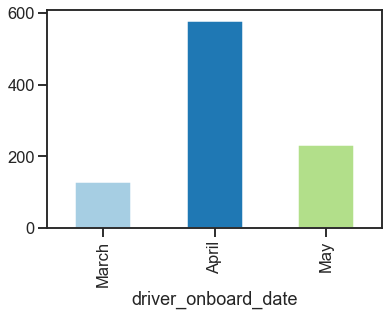

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#

# Monthly number of joined drivers


#### Q2-2. (10 pts)  Weekly
- A week starts from Monday.
- Given a datetime, you can get the first day of week by subtracting days. For example, Sep. 21, 2019 is a Saturday. To get the first day of the week, you can subtract 5 days from it. In other words, 2019/09/21 - 5 days = 2019/09/16, which is a Monday.
- To execute a custom function on the values of a `Series`, you can use `apply()` function. See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) for examples.

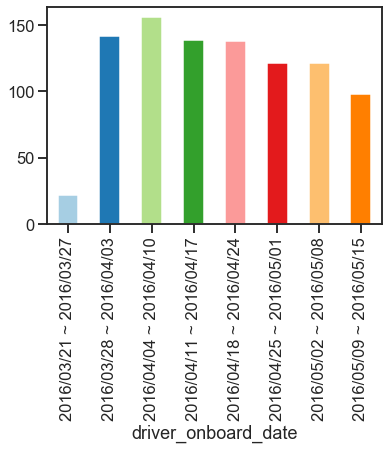

In [0]:
from datetime import timedelta


#---------------------------#
#   Your code goes here     #
#---------------------------#

# Weekly number of joined drivers



#### Q2-3. (5 pts) Daily

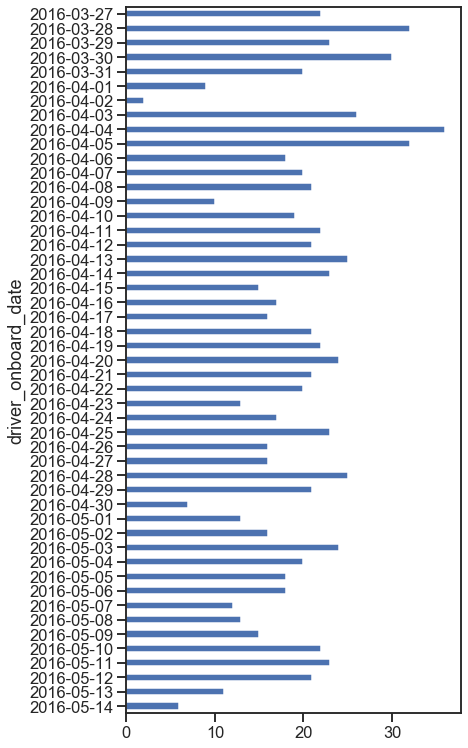

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#

# Daily number of joined drivers


### Ride frequency by drivers

### Q3. (10 pts) Using the ride dataframe, compute and visualize the histogram that shows the distribution of number of rides among Lyft drivers.
- Hint: first, compute the number of rides for each driver and then draw a histogram.
- Play with the histogram by varying the number of bins.
- **Question:** how many modes do you think the histogram has?

driver_id
5ccc0e6dc9c7475caf785cdce7b8eb7a    919
4eb382d1f7d50fae1294964263d1ce82    831
844e9be5a30d8d9c1f8e9ddb086ff717    821
689bdf87fb2de49f98bf4946cfaa5068    794
3788dc9e91f1548816ce8b5af07ddadc    783
                                   ... 
706466935b9e1d04e4e116be7ce90ea9     19
d31eded9263eab43f614eecc6a52a0f5     19
6df6c8f8d3c2a93314245a604c02bed1     16
7ff85c5c0e9324e28d1e0d0589c364bd      3
7b625f643d0775f0ac4898e33235377b      3
Name: ride_id, Length: 937, dtype: int64


[Text(0, 0, '(3,39]'),
 Text(0, 0, '(39,76]'),
 Text(0, 0, '(76,112]'),
 Text(0, 0, '(112,149]'),
 Text(0, 0, '(149,186]'),
 Text(0, 0, '(186,222]'),
 Text(0, 0, '(222,259]'),
 Text(0, 0, '(259,296]'),
 Text(0, 0, '(296,332]'),
 Text(0, 0, '(332,369]'),
 Text(0, 0, '(369,406]'),
 Text(0, 0, '(406,442]'),
 Text(0, 0, '(442,479]'),
 Text(0, 0, '(479,515]'),
 Text(0, 0, '(515,552]'),
 Text(0, 0, '(552,589]'),
 Text(0, 0, '(589,625]'),
 Text(0, 0, '(625,662]'),
 Text(0, 0, '(662,699]'),
 Text(0, 0, '(699,735]'),
 Text(0, 0, '(735,772]'),
 Text(0, 0, '(772,809]'),
 Text(0, 0, '(809,845]'),
 Text(0, 0, '(845,882]'),
 Text(0, 0, '(882,919]')]

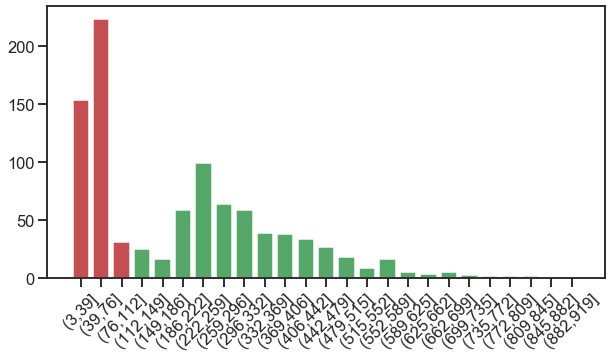

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#



### Rides by distance
The ride dataframe contains the ride distance information in meters for each ride. We will visualize the distribution of ride distances (in miles) using bar graphs and boxplots.

### Q4. Visualize the distribution of ride distances in miles.
- 1 mile = 1609.34 meters

#### Q4-1. (5 pts) Draw a histogram on ride distances in miles.
- Do you think this is an informative visualization?
- What can you say about the ride distances in your dataset?

Text(0, 0.5, 'Count')

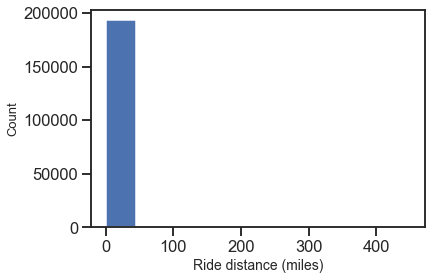

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#


#### Q4-2.  (2.5 pts) Draw a boxplot on the ride_distance attribute.

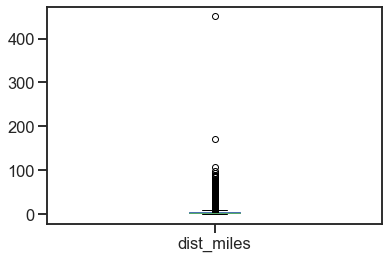

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#



This phenonmenon actually frequently happens in many datasets, especially with attributes that represents some sort of count values. One way to deal with attributes that follows [power laws](https://en.wikipedia.org/wiki/Power_law) is to apply a log transform. In matplotlib, this can be done by setting the scale of axis to a log scale.
 
#### Q4-3. (2.5 pts) Draw a histogram again but this time set y-axis to a log scale.

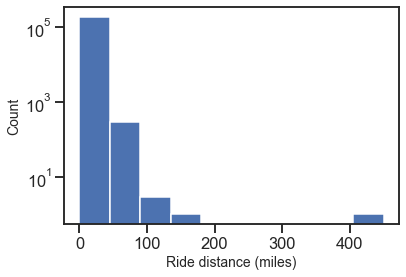

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#



Alternatively, you can build a histogram with varying bin widths. In Maplotlib, this is done by setting `bins` argument with a list of integers, where each integer corresponds to a bounary value of a bin. See the following example.

Text(0.5, 0, 'Distance (miles)')

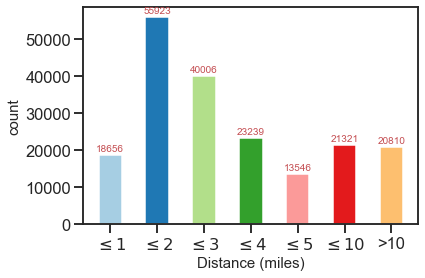

In [0]:
bins = [0, 1, 2, 3, 4, 5, 10, 500]
hist, _ = np.histogram(ride_dist_mile, bins=bins)

fig, ax = plt.subplots()
x = np.arange(len(hist))
ax.bar(x, hist, 0.5, color=plt.cm.Paired(np.arange(len(hist))))
label = [r"$\leq {}$".format(v) for v in bins[1:-1]]
label.append('>10')
ax.set_xticks(x)
ax.set_xticklabels(label)

for i, v in enumerate(hist):
    ax.text(i-0.3, hist[i]+1000, str(hist[i]), color='r')
    
ax.set_ylabel('count', fontsize=15)
ax.set_xlabel('Distance (miles)', fontsize=15)
#ax.set_yscale('log')

#### Q4-4. (5 pts) Select the rows with ride_distance < 50 and build a histogram on those rows.

Text(0, 0.5, 'Count')

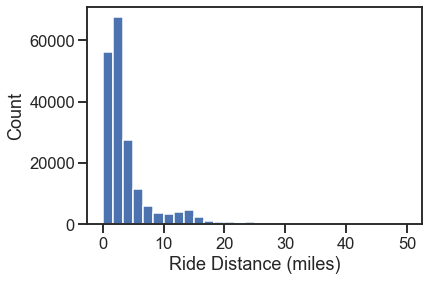

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#



### Distribution of Ride Duration

### Q5. (5 pts) Repeat the same histogram for ride_duration attribute
#### Q5-1. Draw a histogram on ride_duration attribute
- y-axis should be in the log scale.

Text(0.5, 0, 'Duration (minutes)')

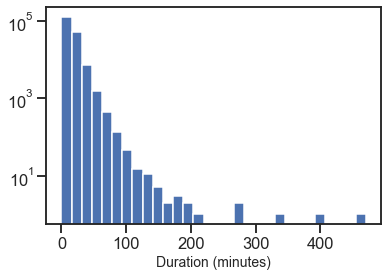

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#


#### Q5-2. Draw a histogram of ride duration over rows with values less than 60 minutes.

Text(0, 0.5, 'Count')

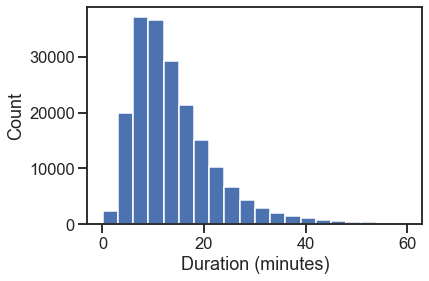

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#



### Driver's lifetime
Now we turn our attention to drivers' lifetime. We define the lifetime of a Lyft driver as the time from his/her first pick-up to the last (i.e., most recent) pick-up. To find each driver's lifetime, we need to merge information from 2 different DataFrames.

In [0]:
ride_timestamp.info()
ride_event = ride_timestamp['event'].value_counts()

#ride_event
print(ride_timestamp.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
ride_id      970405 non-null object
event        970405 non-null object
timestamp    970404 non-null datetime64[ns, US/Pacific]
dtypes: datetime64[ns, US/Pacific](1), object(2)
memory usage: 22.2+ MB
                            ride_id           event                 timestamp
0  00003037a262d9ee40e61b5c0718f7f0    requested_at 2016-06-13 02:39:19-07:00
1  00003037a262d9ee40e61b5c0718f7f0     accepted_at 2016-06-13 02:39:51-07:00
2  00003037a262d9ee40e61b5c0718f7f0      arrived_at 2016-06-13 02:44:31-07:00
3  00003037a262d9ee40e61b5c0718f7f0    picked_up_at 2016-06-13 02:44:33-07:00
4  00003037a262d9ee40e61b5c0718f7f0  dropped_off_at 2016-06-13 03:03:05-07:00


As you can see from the above, ride event (request, accept, pickup, and dropoff) information for each single ride is stored in multiple rows in ride_timestamp dataframe. To connect these 4 different event timestamps with a single row in a ride dataframe, we will need to convert this *vertical* table into a *horizontal* one by creating a new column for each distinct event type.

### Q6. (10 pts) Convert the vertical table into a horizontal one, and then merge it with the ride and driver dataframes.
- When joining ride with ride_timestamps, use the ride_id as a key.
- Join on common ride_ids
- When joining the above merged table with driver table, use the driver_id as a key.
- Join should be based on ride info. (not driver table)

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#

# replace df with the variable name for your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184919 entries, 0 to 184918
Data columns (total 11 columns):
driver_id              184919 non-null object
driver_onboard_date    184309 non-null datetime64[ns, US/Pacific]
ride_id                184819 non-null object
ride_distance          184819 non-null float64
ride_duration          184819 non-null float64
ride_prime_time        184819 non-null float64
accepted_at            184819 non-null datetime64[ns, US/Pacific]
arrived_at             184818 non-null datetime64[ns, US/Pacific]
dropped_off_at         184819 non-null datetime64[ns, US/Pacific]
picked_up_at           184819 non-null datetime64[ns, US/Pacific]
requested_at           184819 non-null datetime64[ns, US/Pacific]
dtypes: datetime64[ns, US/Pacific](6), float64(3), object(2)
memory usage: 16.9+ MB


### Request by Days of Week
One interesting question you can ask to the merged table is "when is the best day to drive for Lyft?".

### Q7. (5 pts) Draw a bar graph showing the number of Lyft requests for each day of week.
- Sort the values in descending order
- Which day of week has the largest number of requests?

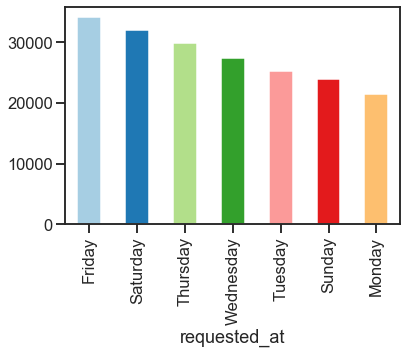

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#


### Q8. (5 pts) Draw a line graph showing the number of requests for each time of day.

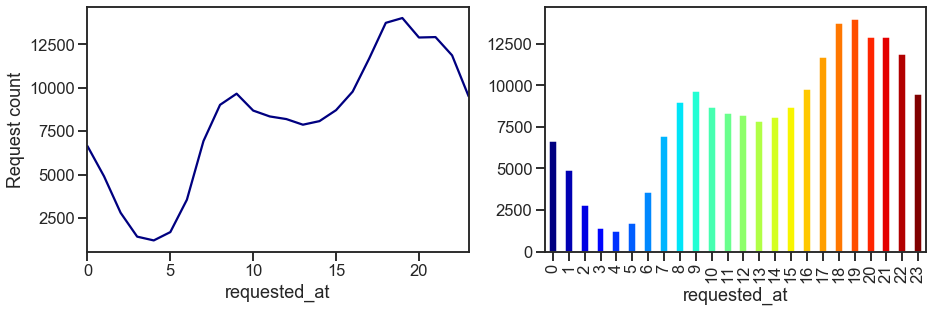

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#


## Driver Lifetime

A driver's lifetime is defined as the time in terms of number of days between his/her first and the last (i.e., most recent) pickups.

### Q9. (10 pts) Compute and visualize the lifetime of drivers.
- Hint: Add a lifetime column and compute the mean of that column
- Hint: to iterate over rows corresponding to a driver, you can combine `groupby()` and `apply()` functions.

#### Q9-1. Compute the average lifetime of drivers.

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#



Avg. lifetime = 54.37 days


#### Q9-2.  Draw a histogram of drivers' lifetime
- Vary the number of bins (`bins` parameter) from 10 to 25, incrementing by 5.

Lifetime (days): mean=54.372037914691944, median=57.0


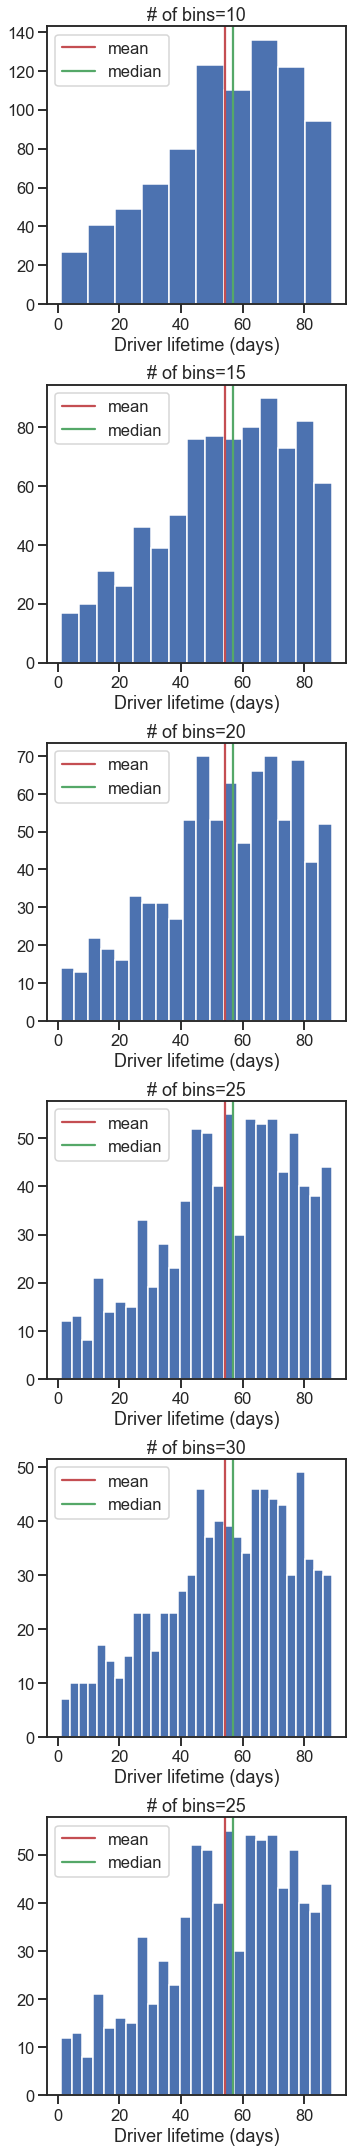

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#


### Q10. (5 pts) Draw a scatter plot of data, where x-axis=lifetime of a driver and y-axis number of rides of the driver.
- We want to see if there's a relationship between the number of rides and lifetime of drivers.


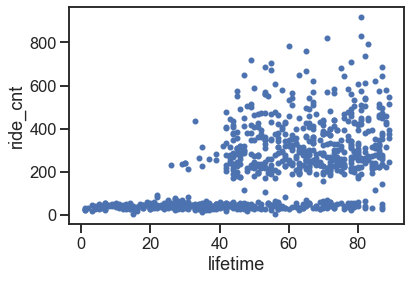

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#


### Visualizaing 3 variables

### Q11. (10 pts) Draw a scatter plot of data, where 
- x-axis = average response time of a driver,
- y-axis = number of rides of a driver, 
- color = lifetime of a driver,
- response time = arrive_at - requested_at, and
- avg_response_time = average response time of a driver.
- Set `alpha=0.5`

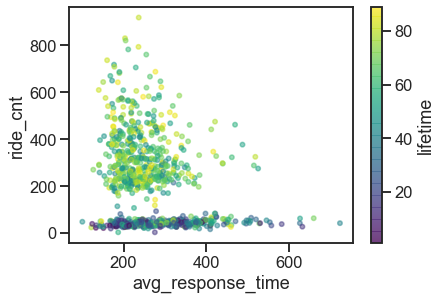

In [0]:
#---------------------------#
#   Your code goes here     #
#---------------------------#

